In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# without oversampling

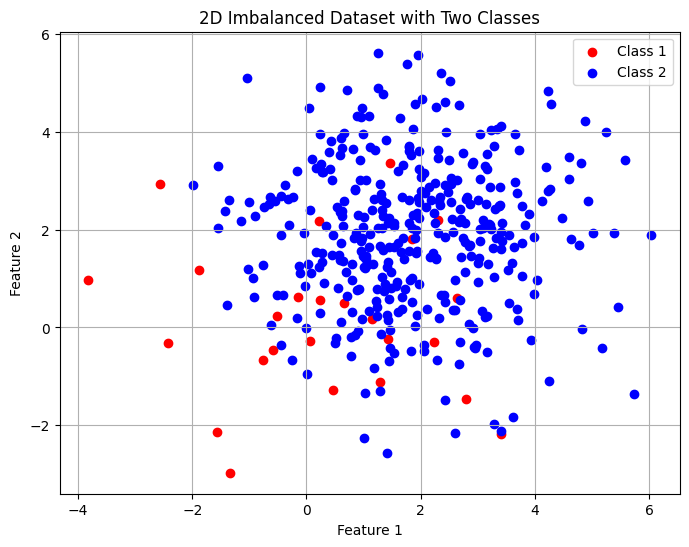

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.96      0.99      0.97        76

    accuracy                           0.95        80
   macro avg       0.73      0.62      0.65        80
weighted avg       0.94      0.95      0.94        80

ROC AUC Score: 0.9473684210526316


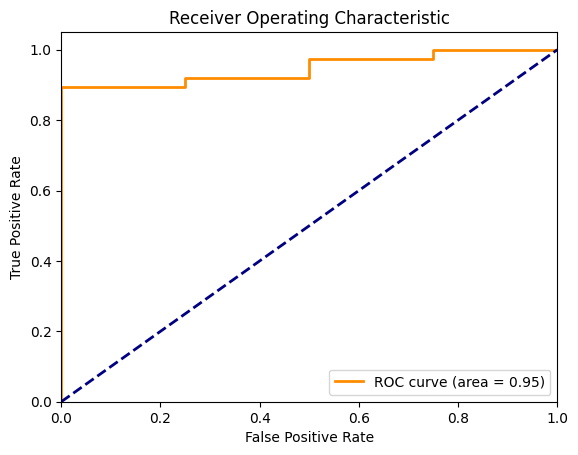

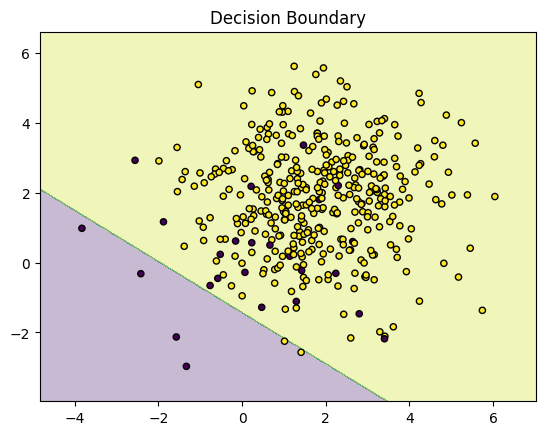

In [3]:
from sklearn.linear_model import LogisticRegression

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict test set
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, classifier)

# applying oversampling

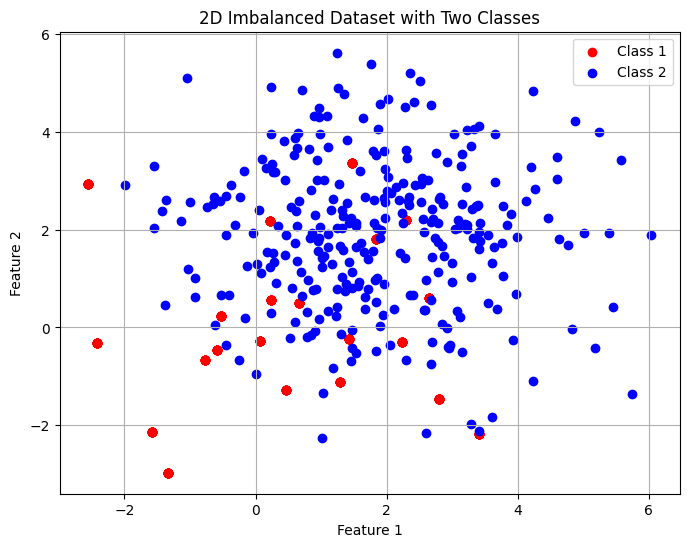

In [4]:
from imblearn.over_sampling import RandomOverSampler
# Applying Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# no change as red class points are overlapping

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80

ROC AUC Score (With Over Sampling): 0.950657894736842


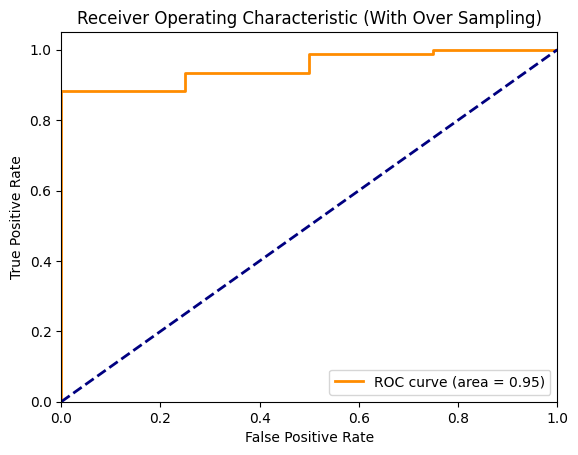

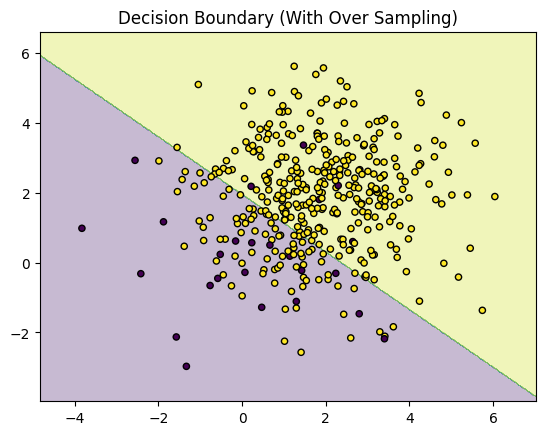

In [6]:
classifier_ros = LogisticRegression()
classifier_ros.fit(X_resampled, y_resampled)

# Predict test set
y_pred_ros = classifier_ros.predict(X_test)
y_proba_ros = classifier_ros.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_ros))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Over Sampling):", roc_auc_score(y_test, y_proba_ros))

# Plotting ROC AUC Curve for resampled data
fpr_ros, tpr_ros, _ = roc_curve(y_test, y_proba_ros)
plt.figure()
plt.plot(fpr_ros, tpr_ros, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_ros))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Over Sampling)')
plt.legend(loc="lower right")
plt.show()

# Function to plot decision boundaries for resampled data
def plot_decision_boundaries_ros(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With Over Sampling)")
    plt.show()

# Plot decision boundary for resampled data
plot_decision_boundaries_ros(X, y, classifier_ros)